In [1]:
%run ../IDS_smooth_local.py
%run ../rule_miner.py 
%run ../rules.py

In [39]:
from pyarc.data_structures import TransactionDB
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import pandas as pd
import numpy
import re



movies = pd.read_csv("../data/movies.csv", sep=";")
movies_discr = movies.copy(True)

budget_bins = range(0, 350, 50)
budget_bins_names = [ "<{0};{1})".format(i, i + 50) for i in budget_bins[:-1] ]

celebrities_bins = range(0, 10, 2)
celebrities_bins_names = [ "<{0};{1})".format(i, i + 2) for i in celebrities_bins[:-1] ]


transactionDB = TransactionDB.from_DataFrame(movies_discr, unique_transactions=True)

movies_vals = movies.get_values()

x = range(0, 350, 50)
y = range(1, 9)


x_points = list(map(lambda n: n[0], movies_vals))
y_points = list(map(lambda n: n[1], movies_vals))
data_class = list(movies['class'])
appearance = {
    'box-office-bomb': ('brown', "o"),
    'main-stream-hit': ('blue', "o"),
    'critical-success': ('green', "o")
}
rule_appearance = {
    'box-office-bomb': 'tan',
    'main-stream-hit': 'aqua',
    'critical-success': 'lightgreen'
}

plt.style.use('seaborn-white')


def plot_qrule(qrule, plt):
    interval_regex = "(?:<|\()(\d+(?:\.(?:\d)+)?);(\d+(?:\.(?:\d)+)?)(?:\)|>)"
    
    lower_y = 0
    area_y = celebrities_bins[-1]
    
    lower_x = 0
    area_x = budget_bins[-1]
    
    antecedent = qrule.antecedent
    
    
    if len(antecedent) != 0:
        if antecedent[0][0] == "a-list-celebrities":
            y = antecedent[0]
            y_boundaries = re.search(interval_regex, repr(y[1]))
            lower_y = float(y_boundaries.group(1))
            upper_y = float(y_boundaries.group(2))
            area_y = upper_y - lower_y

            axis = plt.gca()
        else:
            x = antecedent[0]
            x_boundaries = re.search(interval_regex, repr(x[1]))
            lower_x = float(x_boundaries.group(1))
            upper_x = float(x_boundaries.group(2))
            area_x = upper_x - lower_x
        
    if len(antecedent) > 1:
        if antecedent[1][0] == "a-list-celebrities":
            y = antecedent[0]
            y_boundaries = re.search(interval_regex, repr(y[1]))
            lower_y = float(y_boundaries.group(1))
            upper_y = float(y_boundaries.group(2))
            area_y = upper_y - lower_y

            axis = plt.gca()
        else:
            x = antecedent[1]
            x_boundaries = re.search(interval_regex, repr(x[1]))
            lower_x = float(x_boundaries.group(1))
            upper_x = float(x_boundaries.group(2))
            area_x = upper_x - lower_x
            
    
    axis = plt.gca()

    class_name = qrule.consequent[1]
    
    axis.add_patch(
       patches.Rectangle((lower_x, lower_y), area_x, area_y, zorder=-2, facecolor=rule_appearance[class_name], alpha=qrule.confidence)
    )




def plot_IDS_rule(rule, plt):
    interval_regex = "<(\d+);(\d+)\)"
    
    lower_y = 0
    area_y = celebrities_bins[-1]
    
    lower_x = 0
    area_x = budget_bins[-1]
    
    
    itemset = list(rule.itemset)
    
    
    if len(itemset) != 0:
        if itemset[0][0] == "a-list-celebrities":
            y = itemset[0]
            y_boundaries = re.search(interval_regex, y[1])
            lower_y = float(y_boundaries.group(1))
            upper_y = float(y_boundaries.group(2))
            area_y = upper_y - lower_y

            axis = plt.gca()
        else:
            x = itemset[0]
            x_boundaries = re.search(interval_regex, x[1])
            lower_x = float(x_boundaries.group(1))
            upper_x = float(x_boundaries.group(2))
            area_x = upper_x - lower_x
        
    if len(itemset) > 1:
        if itemset[1][0] == "a-list-celebrities":
            y = itemset[1]
            y_boundaries = re.search(interval_regex, y[1])
            lower_y = float(y_boundaries.group(1))
            upper_y = float(y_boundaries.group(2))
            area_y = upper_y - lower_y

            axis = plt.gca()
        else:
            x = itemset[1]
            x_boundaries = re.search(interval_regex, x[1])
            lower_x = float(x_boundaries.group(1))
            upper_x = float(x_boundaries.group(2))
            area_x = upper_x - lower_x
            
    
    axis = plt.gca()

    class_name = rule.class_label
    
    axis.add_patch(
       patches.Rectangle((lower_x, lower_y), area_x, area_y, zorder=-2, facecolor=rule_appearance[class_name], alpha=0.8)
    )


def plot_rule(rule, plt):
    interval_regex = "<(\d+);(\d+)\)"
    
    lower_y = 0
    area_y = celebrities_bins[-1]
    
    lower_x = 0
    area_x = budget_bins[-1]
    
    
    
    
    if len(rule.antecedent) != 0:
        if rule.antecedent[0][0] == "a-list-celebrities":
            y = rule.antecedent[0]
            y_boundaries = re.search(interval_regex, y[1])
            lower_y = float(y_boundaries.group(1))
            upper_y = float(y_boundaries.group(2))
            area_y = upper_y - lower_y

            axis = plt.gca()
        else:
            x = rule.antecedent[0]
            x_boundaries = re.search(interval_regex, x[1])
            lower_x = float(x_boundaries.group(1))
            upper_x = float(x_boundaries.group(2))
            area_x = upper_x - lower_x
        
    if len(rule.antecedent) > 1:
        if rule.antecedent[1][0] == "a-list-celebrities":
            y = rule.antecedent[1]
            y_boundaries = re.search(interval_regex, y[1])
            lower_y = float(y_boundaries.group(1))
            upper_y = float(y_boundaries.group(2))
            area_y = upper_y - lower_y

            axis = plt.gca()
        else:
            x = rule.antecedent[1]
            x_boundaries = re.search(interval_regex, x[1])
            lower_x = float(x_boundaries.group(1))
            upper_x = float(x_boundaries.group(2))
            area_x = upper_x - lower_x
            
    
    axis = plt.gca()

    class_name = rule.consequent[1]
    
    axis.add_patch(
       patches.Rectangle((lower_x, lower_y), area_x, area_y, zorder=-2, facecolor=rule_appearance[class_name], alpha=rule.confidence)
    )



def plot_quant_rules(qrules):
    for r in qrules:
        plot_qrule(r, plt)

    # data cases
    for i in range(len(x_points)):
        plt.scatter(x_points[i], y_points[i], marker=appearance[data_class[i]][1], color=appearance[data_class[i]][0], s=60)


    # rule boundary lines
    for i, n in enumerate(x):
        plt.axhline(y=y[i], color = "grey", linestyle="dashed")
        plt.axvline(x=x[i], color = "grey", linestyle="dashed")

        
        
    plt.xlabel('Estimated Budget (1000$)')
    plt.ylabel('A-List Celebrities')

    
def plot_IDS_rules(rules):
    for r in rules:
        plot_IDS_rule(r, plt)

    # data cases
    for i in range(len(x_points)):
        plt.scatter(x_points[i], y_points[i], marker=appearance[data_class[i]][1], color=appearance[data_class[i]][0], s=60)


    # rule boundary lines
    for i, n in enumerate(x):
        plt.axhline(y=y[i], color = "grey", linestyle="dashed")
        plt.axvline(x=x[i], color = "grey", linestyle="dashed")

        
        
    plt.xlabel('Estimated Budget (1000$)')
    plt.ylabel('A-List Celebrities')


def plot_rules(rules):
    for r in rules:
        plot_rule(r, plt)

    # data cases
    for i in range(len(x_points)):
        plt.scatter(x_points[i], y_points[i], marker=appearance[data_class[i]][1], color=appearance[data_class[i]][0], s=60)


    # rule boundary lines
    for i, n in enumerate(x):
        plt.axhline(y=y[i], color = "grey", linestyle="dashed")
        plt.axvline(x=x[i], color = "grey", linestyle="dashed")

        
        
    plt.xlabel('Estimated Budget (1000$)')
    plt.ylabel('A-List Celebrities')

In [33]:
import pandas as pd
import numpy as np


from multiprocessing import Pool


from sklearn.metrics import accuracy_score

from pyarc import TransactionDB
from pyarc.algorithms import (
    top_rules,
    createCARs,
    M1Algorithm
)
from pyarc import CBA, TransactionDB
        


"""
lambda_array = [1.0]*7     # use separate hyperparamter search routine
s1 = smooth_local_search(list_of_rules, df, Y, lambda_array, 0.33, 0.33)
s2 = smooth_local_search(list_of_rules, df, Y, lambda_array, 0.33, -1.0)
f1 = func_evaluation(s1, list_of_rules, df, Y, lambda_array)
f2 = func_evaluation(s2, list_of_rules, df, Y, lambda_array)

result_set = {}
if f1 > f2:
    print("The Solution Set is: "+str(s1))
    result_set = list(s1)
else:
    print("The Solution Set is: "+str(s2))
    result_set = list(s2)
"""

df = pd.read_csv('../data/movies_discr.csv', ';')
df = df.iloc[:,1:]
df_raw = df.iloc[:, :-1]
Y = df.iloc[:, -1]

txns_train = TransactionDB.from_DataFrame(df)

rules = run_fim_apriori(df_raw, 0.1)
list_of_rules = createrules(rules, list(set(Y)))

prepare_caches(list_of_rules, df, Y)
prepare_overlap(list_of_rules, df)

def optimize(param):
    #lambda_array = [1.0]*7     # use separate hyperparamter search routine
    lambda_array = [1, 0, 0, 1, 0, 0, 0]
    
    s1 = smooth_local_search(list_of_rules, df, Y, lambda_array, 0.33, param)
    f1 = func_evaluation(s1, list_of_rules, df, Y, lambda_array, len(list_of_rules))

    return f1, s1

def f(x):
    return x * x

if __name__ == "__main__":
   

    print("---------------------")
    print("Training CBA model")
    print("---------------------")

    cba = CBA(support=0.01, confidence=0, algorithm="m1")
    cba.fit(txns_train)

    cba_accuracy = cba.rule_model_accuracy(txns_train)

    # precompute values for cover and correct cover
    

    print("---------------------")
    print("All mined rules for IDS")
    print("---------------------")
    for r in list_of_rules:
        r.print_rule()

    print("---------------------")
    print("Starting SLS")
    print("---------------------")
    

    

    
    results = list(map(optimize, [0.33, -1.0]))

    #results = process_pool.map(f, [2, 3])

    (f1, s1), (f2, s2) = results 

    result_set = {}
    if f1 > f2:
        print("The Solution Set is: "+str(s1))
        result_set = list(s1)
    else:
        print("The Solution Set is: "+str(s2))
        result_set = list(s2)




    np_rules = np.array(list_of_rules)
    solution_rules = np_rules[result_set]

    print("---------------------")
    print("IDS rules")
    print("---------------------")
    for r in solution_rules:
        r.print_rule()
    
    print("---------------------")
    print("CBA rules")
    print("---------------------")
    for r in cba.clf.rules:
        print(r)

    print("----------------------")

    pred = predict(result_set, list_of_rules, df, Y)
    print("IDS accuracy", accuracy_score(pred, Y))
    print("CBA accuracy", cba_accuracy)


---------------------
Training CBA model
---------------------
---------------------
All mined rules for IDS
---------------------
If estimated-budget == <100;150), then critical-success
If estimated-budget == <100;150), then main-stream-hit
If estimated-budget == <100;150), then box-office-bomb
If estimated-budget == <150;200), then critical-success
If estimated-budget == <150;200), then main-stream-hit
If estimated-budget == <150;200), then box-office-bomb
If estimated-budget == <150;200) and a-list-celebrities == <2;4), then critical-success
If estimated-budget == <150;200) and a-list-celebrities == <2;4), then main-stream-hit
If estimated-budget == <150;200) and a-list-celebrities == <2;4), then box-office-bomb
If estimated-budget == <0;50), then critical-success
If estimated-budget == <0;50), then main-stream-hit
If estimated-budget == <0;50), then box-office-bomb
If a-list-celebrities == <0;2) and estimated-budget == <0;50), then critical-success
If a-list-celebrities == <0;2) an

D:\programy\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [32]:
df.iloc[:,1:]

,estimated-budget,a-list-celebrities,class
1,<50;100),<0;2),box-office-bomb
2,<50;100),<0;2),box-office-bomb
3,<50;100),<2;4),box-office-bomb
4,<200;250),<0;2),box-office-bomb
5,<150;200),<0;2),box-office-bomb
6,<0;50),<0;2),box-office-bomb
7,<200;250),<2;4),box-office-bomb
8,<150;200),<2;4),box-office-bomb
9,<100;150),<0;2),box-office-bomb
10,<0;50),<0;2),box-office-bomb


In [7]:
for r in cba.clf.rules:
        print(r)

CAR {petalwidth=0.8_to_1.75} => {class=Iris-versicolor} sup: 0.33 conf: 0.90 len: 2, id: 20
CAR {petallength=4.75_to_inf} => {class=Iris-virginica} sup: 0.33 conf: 0.90 len: 2, id: 27


If estimated-budget == <100;150), then main-stream-hit
If estimated-budget == <150;200), then critical-success
If estimated-budget == <150;200), then main-stream-hit
If estimated-budget == <150;200) and a-list-celebrities == <2;4), then critical-success
If a-list-celebrities == <0;2) and estimated-budget == <0;50), then critical-success
If a-list-celebrities == <0;2) and estimated-budget == <0;50), then main-stream-hit
If a-list-celebrities == <4;6), then critical-success
If a-list-celebrities == <0;2), then critical-success
If estimated-budget == <50;100), then main-stream-hit
If estimated-budget == <50;100), then box-office-bomb
If a-list-celebrities == <2;4) and estimated-budget == <50;100), then main-stream-hit
If a-list-celebrities == <2;4) and estimated-budget == <50;100), then box-office-bomb
If a-list-celebrities == <2;4), then critical-success
If a-list-celebrities == <2;4), then main-stream-hit


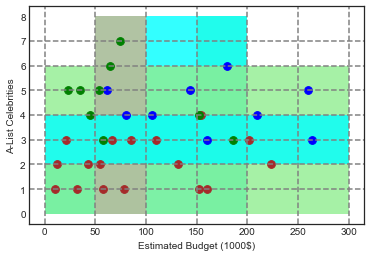

In [44]:

for r in solution_rules:
    r.print_rule()
    
    
solution_rules[0].itemset 
plot_IDS_rules(solution_rules)
plt.show()